In [761]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

In [762]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
import seaborn as sns
import scipy as stats
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
import math
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Experiment Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<font color=blue>**Paid FinApp Experiment Analysis**<font color=black><br />
**Report**<br />
1. Test result:<br /> Average revenue per user: new design 14.51> old design 11.99, P value=0, reject the null hypothesis, there is a significant difference between new design and old design.<br />Average time spent on App: new design 121.75 < old design 134.90. P value=0, reject the null hypothesis, there is a significant difference between the new design and the old design. <br/>Subscription rate: new design 0.4922 < old design 0.4952, P value=0.073 > 0.05, fail to reject the null hypothesis, there is no association between design and subscribed rate.<br />Retention rate: new design 0.4123 < old design 0.5863 P value=2.099e-137, reject the null hypothesis, there is an association between design and retention rate.<br />2. Short-term impact: <br/>Monetation from the new design is significantly higher than the old design, however, engagement on the old design is significantly higher than the new design. These results show new design is more attractive than the old design. For some reason, users engage less with the new App. In the short term, there are significant differences between new design and old design.<br/>3. Long-term impact:<br />Although the old design has a slightly higher subscription rate than the new design, the difference is not significant. Therefore, in the long run, the type of design has no impact on the Premium Newsletter Subscription rate. However, the types of design have a significant impact on the retention rate that shows old design retains more users than the new design. <br />
**Recommendation**<br />
The new design can attract more new users to sign up and pay for the App, this can be a signal that users like the new design and expect the APP will provide better features and service. However, they are disappointed after one week of being active on the App. On the other hand, the old design is not as attractive as the new design, but they enjoy the App more than the old design. It seems like they enjoy the older features in the old design. To increase the user's enagagment rate and retension rate, the company should consider to apply some of the old features to the new design. To improve the Premium Newsletter Subscription rate, since the change of the design is not directly related to the subscribed rate, the company should find other relative factors.  


<font color='blue'>**Read data**</font>

In [763]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Experiment Data.csv")
df.head()

,Userid,Design,Revenue First Week,Time Spent (Minutes) First Week,Subscribed (Y/N),Retained After First Week?
0,101,New,16,137,No,Yes
1,102,Old,8,111,No,No
2,103,New,12,127,No,No
3,104,Old,15,120,No,No
4,105,New,16,97,No,No


In [764]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [765]:
df = df.rename(columns={"Userid": "user_id", "Design": "design","Revenue First Week": "revenue", "Time Spent (Minutes) First Week": "time_spent","Subscribed (Y/N)": "is_subscribed",
                   "Retained After First Week?": "is_retained"})
df.head()


,user_id,design,revenue,time_spent,is_subscribed,is_retained
0,101,New,16,137,No,Yes
1,102,Old,8,111,No,No
2,103,New,12,127,No,No
3,104,Old,15,120,No,No
4,105,New,16,97,No,No


In [766]:
df.info

<bound method DataFrame.info of        user_id design  revenue  time_spent is_subscribed is_retained
0          101    New       16         137            No         Yes
1          102    Old        8         111            No          No
2          103    New       12         127            No          No
3          104    Old       15         120            No          No
4          105    New       16          97            No          No
...        ...    ...      ...         ...           ...         ...
20623    20724    New       15         152           Yes          No
20624    20725    New       17         111           Yes          No
20625    20726    New       14         115            No         Yes
20626    20727    New       11         116            No          No
20627    20728    New       11         113            No          No

[20628 rows x 6 columns]>

In [767]:
df.describe()

,user_id,revenue,time_spent
count,20628.000000,20628.000000,20628.000000
mean,10414.500000,13.302792,128.040915
std,5954.935012,2.661661,24.810870
min,101.000000,3.000000,1.000000
25%,5257.750000,11.000000,111.000000
50%,10414.500000,13.000000,128.000000
75%,15571.250000,15.000000,145.000000
max,20728.000000,25.000000,224.000000


In [768]:
df.shape

(20628, 6)

In [769]:
df['design'].value_counts()

New    10763
Old     9865
Name: design, dtype: int64

In [770]:
len(df)

20628

<font color='blue'>**Data Manupilation**</font>

In [771]:
old_design_df=df[df.design=='Old']
old_design_df.head()

,user_id,design,revenue,time_spent,is_subscribed,is_retained
1,102,Old,8,111,No,No
3,104,Old,15,120,No,No
5,106,Old,9,136,Yes,No
7,108,Old,8,154,Yes,Yes
11,112,Old,11,120,Yes,Yes


In [772]:
new_design_df=df[df.design=='New']
new_design_df.head()

,user_id,design,revenue,time_spent,is_subscribed,is_retained
0,101,New,16,137,No,Yes
2,103,New,12,127,No,No
4,105,New,16,97,No,No
6,107,New,12,117,Yes,Yes
8,109,New,17,151,No,No


In [773]:
print(len(new_design_df))
print(len(old_design_df))

10763
9865


In [774]:
df.groupby(['design']).value_counts()

design  user_id  revenue  time_spent  is_subscribed  is_retained
New     101      16       137         No             Yes            1
        103      12       127         No             No             1
        20521    13       98          Yes            No             1
        20499    15       93          No             No             1
        20498    11       161         Yes            No             1
                                                                   ..
Old     13003    11       109         Yes            No             1
        13001    11       126         No             Yes            1
        13000    14       149         Yes            No             1
        12998    14       152         No             Yes            1
        19832    10       102         Yes            Yes            1
Length: 20628, dtype: int64

In [775]:
df.groupby(['is_retained']).value_counts()

is_retained  user_id  design  revenue  time_spent  is_subscribed
No           102      Old     8        111         No               1
             103      New     12       127         No               1
             20679    New     12       144         No               1
             20676    New     16       110         Yes              1
             20675    New     13       129         No               1
                                                                   ..
Yes          13677    Old     11       84          No               1
             13676    New     14       131         Yes              1
             13675    Old     15       140         No               1
             13674    Old     11       127         No               1
             20726    New     14       115         No               1
Length: 20628, dtype: int64

In [776]:
df.is_subscribed.value_counts()

No     10350
Yes    10278
Name: is_subscribed, dtype: int64

In [777]:
df.is_retained.value_counts()

No     10406
Yes    10222
Name: is_retained, dtype: int64

**Summary on the mean:** <br />1. Average first week revenue per user is 13.30.  <br /> New user average revenue is 14.51 and Old user average revenue is 11.99. <br />2. Average first week time spent on the webpage is 128.04.<br /> New user average time spent on the webpage is 121.75, and old user average time spent on the webpage is 134.90.

In [778]:
df.groupby(['design']).mean()

<ipython-input-778-3bab878f67e1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['design']).mean()


,user_id,revenue,time_spent
design,,,
New,10802.941187,14.509895,121.754344
Old,9990.699442,11.985808,134.899747


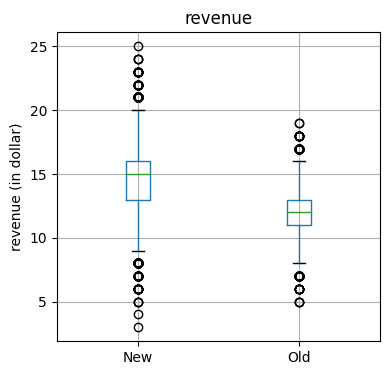

In [779]:
 df_r= df.boxplot(by='design', column='revenue',
                           figsize=(4, 4))
df_r.set_xlabel('')
df_r.set_ylabel('revenue (in dollar)')
plt.suptitle('')

plt.tight_layout()
plt.show()

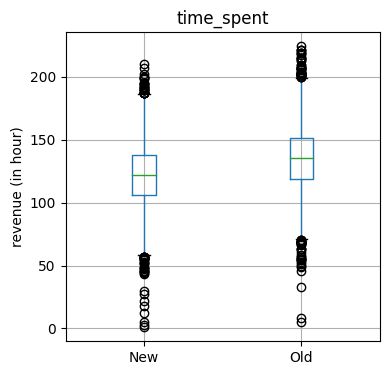

In [780]:
 df_t= df.boxplot(by='design', column='time_spent',
                           figsize=(4, 4))
df_t.set_xlabel('')
df_t.set_ylabel('revenue (in hour)')
plt.suptitle('')

plt.tight_layout()
plt.show()

**Summary of subscribed rate:** <br />total subscribed rate= 0.4943
New subscribeded rate=0.4922
Old subscribed rate = 0.4952

In [781]:
data_Subscribed=pd.DataFrame(data.groupby("Design")["Subscribed (Y/N)"].value_counts())
data_Subscribed

Subscribed (Y/N)
Design Subscribed (Y/N)                  
New    No                            5465
       Yes                           5298
Old    Yes                           4980
       No                            4885

In [782]:
Subscribed_rate=(5298+4980)/(5465+5465+4980+4885)
New_Subscribed_rate= 5298/(5298+5465)
Old_Subscribed_rate=4885/(4885+4980)
print(Subscribed_rate)
print(New_Subscribed_rate)
print(Old_Subscribed_rate)
print("total subscribed rate= 0.4943")
print("New subscribeded rate=0.4922")
print("Old subscribed rate = 0.4952")

0.4942534263044001
0.4922419399795596
0.49518499746578815
total subscribed rate= 0.4943
New subscribeded rate=0.4922
Old subscribed rate = 0.4952


**Summary of retention rate:**<br /> total subscribed rate= 0.4943
New subscribeded rate=0.4922
Old subscribed rate = 0.4952

In [783]:
data_retained=pd.DataFrame(data.groupby("Design")["Retained After First Week?"].value_counts())
data_retained.head

<bound method NDFrame.head of                                    Retained After First Week?
Design Retained After First Week?                            
New    No                                                6325
       Yes                                               4438
Old    Yes                                               5784
       No                                                4081>

In [784]:
Retained_rate=(4438+5784)/(6325+4438+5784+4081)
New_Retained_rate= 4438/(4438+6325)
Old_Retained_rate=5784/(5784+4081)
print(Retained_rate)
print(New_Retained_rate)
print(Old_Retained_rate)
print("total retained rate= 0.4955")
print("New retained rate=0.4123")
print("Old retained rate = 0.5863")

0.49554004266046153
0.4123385673139459
0.5863152559553979
total retained rate= 0.4955
New retained rate=0.4123
Old retained rate = 0.5863


In [785]:
data_Subscribed=pd.DataFrame(data.groupby("Design")["Subscribed (Y/N)"].value_counts())
data_Subscribed

Subscribed (Y/N)
Design Subscribed (Y/N)                  
New    No                            5465
       Yes                           5298
Old    Yes                           4980
       No                            4885

<font color=blue>**Bootstrapping**

**Bootstrapping For Revenue**

In [786]:
New_Design_Revenue=new_design_df[['revenue']]
New_Design_Revenue.head()

,revenue
0,16
2,12
4,16
6,12
8,17


In [787]:
Old_Design_Revenue=old_design_df[['revenue']]
Old_Design_Revenue.head()

,revenue
1,8
3,15
5,9
7,8
11,11


In [788]:
New1=new_design_df.revenue
New1.head()

0    16
2    12
4    16
6    12
8    17
Name: revenue, dtype: int64

In [789]:
Old1=old_design_df.revenue
Old1.head()

1      8
3     15
5      9
7      8
11    11
Name: revenue, dtype: int64

In [790]:
#x=df[df.design=="New"].revenue
#y=df[df.design=="Old"].revenue
#print(x)
#print(y)

In [791]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power
import matplotlib.pylab as plt
import numpy as np
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt
import random


In [792]:
results = []
for nrepeat in range(1000):
    sample=resample(New1)
    results.append(sample.median())
results = pd.Series(results)

In [793]:
print('Bootstrap Statistics:')
print(f'original: {New1.median()}')
print(f'bias: {results.mean() - New1.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 15.0
bias: -0.17300000000000004
std. error: 0.3784365392165696


In [794]:
results = []
for nrepeat in range(1000):
    sample=resample(Old1)
    results.append(sample.median())
results = pd.Series(results)

In [795]:
print('Bootstrap Statistics:')
print(f'original: {Old1.median()}')
print(f'bias: {results.mean() - Old1.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 12.0
bias: 0.0
std. error: 0.0


**Bootstrapping For Time Spent**

In [913]:
New_Design_Time=new_design_df[['time_spent']]
New_Design_Time.head()

,time_spent
0,137
2,127
4,97
6,117
8,151


In [797]:
Old_Design_Time=old_design_df[['time_spent']]
Old_Design_Time.head()

,time_spent
1,111
3,120
5,136
7,154
11,120


In [798]:
New_t=new_design_df.time_spent
New_t.head()

0    137
2    127
4     97
6    117
8    151
Name: time_spent, dtype: int64

In [799]:
Old_t=old_design_df.time_spent
Old_t.head()

1     111
3     120
5     136
7     154
11    120
Name: time_spent, dtype: int64

In [800]:
results = []
for nrepeat in range(1000):
    sample=resample(New_t)
    results.append(sample.median())
results = pd.Series(results)

In [801]:
print('Bootstrap Statistics:')
print(f'original: {New_t.median()}')
print(f'bias: {results.mean() - New_t.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 122.0
bias: -0.1460000000000008
std. error: 0.3561050558624671


In [802]:
results = []
for nrepeat in range(1000):
    sample=resample(Old_t)
    results.append(sample.median())
results = pd.Series(results)

In [803]:
print('Bootstrap Statistics:')
print(f'original: {Old_t.median()}')
print(f'bias: {results.mean() - Old_t.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 135.0
bias: 0.11899999999999977
std. error: 0.370102655996922


 <font color='blue'>**2 samples  t-test**</font>

**1. T-test and F-test for revenue:**

> Hypothesis is there is no difference between New design and Old design at average revenue per user.



In [804]:
df['revenue'].mean()

13.302792321116929

**F-test** for the Variance of new and old design first week revenue

H0: New design variance = Old desing variance <br />
H1: New design variance != Old desing variance

In [805]:
stats.levene(new_design_df['revenue'],old_design_df['revenue'])

LeveneResult(statistic=1155.6886964889036, pvalue=1.6065292993662759e-246)

Conclusion: <br />P.Value<0.05 (Since P.Value is so low...there is difference between Variance)<br /> Reject the Null hypothesis. <br />revenue from new design and old design is sinificant different. <br />Therefore, **test test should apply unequal variance.**

In [899]:
x=new_design_df['revenue'].var()
y=old_design_df['revenue'].var()
print(x)
print(y)

7.340800611537082
3.4809421307686206


In [908]:
df1 = len(new_design_df) - 1
df2 = len(old_design_df) - 1
print(df1)
print(df2)

10762
9864


In [807]:
F_test_result=7.34/3.48
F_test_result

2.1091954022988504

**t-test**

In [808]:
stats.ttest_ind(new_design_df['revenue'],old_design_df['revenue'])

TtestResult(statistic=77.2522603610491, pvalue=0.0, df=20626.0)

In [809]:
print(new_design_df['revenue'].mean())
print(old_design_df['revenue'].mean())

14.509895010684753
11.985808413583376


In [810]:
group1 = df[df['design']=='New']
group2 = df[df['design']=='Old']
ttest_ind(group1['revenue'],group2['revenue'])

TtestResult(statistic=77.2522603610491, pvalue=0.0, df=20626.0)

Conclusion:<br /> P Value is close to 0 <0.05, there is significant difference on the first week revenue between New design and Old design. <br /> New design generate higher revenue than old design.


Text(0.5, 1.0, 'Distribution of Revenue for New and Old Designs')

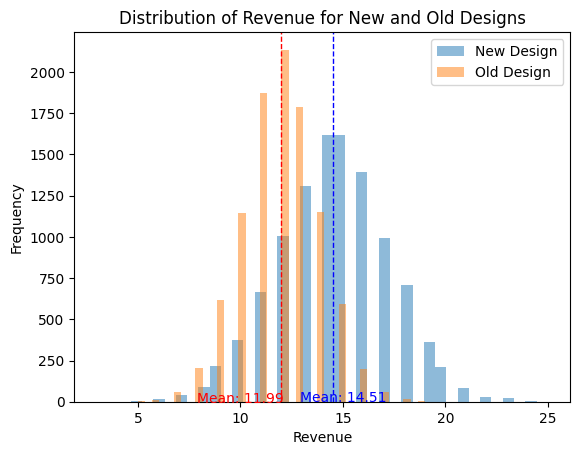

In [811]:
plt.hist(new_design_df['revenue'], alpha=0.5, label='New Design', bins=40)
plt.hist(old_design_df['revenue'], alpha=0.5, label='Old Design', bins=40)

plt.axvline(new_design_df['revenue'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(old_design_df['revenue'].mean(), color='red', linestyle='dashed', linewidth=1)

mean1=new_design_df['revenue'].mean()
mean2=old_design_df['revenue'].mean()

plt.text(15, mean1 + 7, f'Mean: {mean1:.2f}', ha='center', va='center', color='blue')
plt.text(10, mean2 + 3, f'Mean: {mean2:.2f}', ha='center', va='center', color='red')

plt.legend()
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue for New and Old Designs')

**Confidential interval**

In [812]:
df.describe()

,user_id,revenue,time_spent
count,20628.000000,20628.000000,20628.000000
mean,10414.500000,13.302792,128.040915
std,5954.935012,2.661661,24.810870
min,101.000000,3.000000,1.000000
25%,5257.750000,11.000000,111.000000
50%,10414.500000,13.000000,128.000000
75%,15571.250000,15.000000,145.000000
max,20728.000000,25.000000,224.000000


In [813]:
new_design_df.describe()

,user_id,revenue,time_spent
count,10763.000000,10763.000000,10763.000000
mean,10802.941187,14.509895,121.754344
std,6168.186215,2.709391,23.578191
min,101.000000,3.000000,1.000000
25%,5417.000000,13.000000,106.000000
50%,10822.000000,15.000000,122.000000
75%,16247.500000,16.000000,138.000000
max,20728.000000,25.000000,210.000000


In [814]:
old_design_df.describe()

,user_id,revenue,time_spent
count,9865.000000,9865.000000,9865.000000
mean,9990.699442,11.985808,134.899747
std,5683.304875,1.865728,24.301211
min,102.000000,5.000000,5.000000
25%,5075.000000,11.000000,119.000000
50%,10009.000000,12.000000,135.000000
75%,14920.000000,13.000000,151.000000
max,19832.000000,19.000000,224.000000


In [815]:
new_design_df.var()

<ipython-input-815-9416ae1b80bb>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_design_df.var()


user_id       3.804652e+07
revenue       7.340801e+00
time_spent    5.559311e+02
dtype: float64

In [816]:
old_design_df.var()

<ipython-input-816-5fac80e3dc15>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  old_design_df.var()


user_id       3.229995e+07
revenue       3.480942e+00
time_spent    5.905488e+02
dtype: float64

first week revenue <br/>t score=77.25 STD=2.66, standard error(new)=2.71  standard error(old)=1.87  population mean=13.30 vaiance(new)=7.34e variance(old)=3.48e

In [817]:
#x1 <-rnorm(10763, mean = 14.51, sd = 2.709)
#x2 <-rnorm(10763, mean = 11.986, sd = 1.866)


#t_res <- t.test(X1, X2, alternative == 'two.sided', var.equal == FALSE)
#t_res

**2. t-test for time spent** <br /> Hypothesis is there is no difference between New design and Old design at first week time spent.

In [818]:
df['time_spent'].mean()

128.04091526081055

**F-test** for the Variance of new and old design on first week time spent

H0: New design time spent variance = Old desing variance <br />
H1: New design tiem spent variance != Old desing variance

In [819]:
stats.levene(new_design_df['time_spent'],old_design_df['time_spent'])

LeveneResult(statistic=9.423600880818944, pvalue=0.0021448872219060815)

Conclusion: <br />P.Value<0.05 (Since P.Value is so low...there is difference between Variance)<br /> Reject the Null hypothesis. <br />First week time spent on new design and old design is sinificant different. <br />Therefore, test test should apply unequal variance.

In [820]:
print(new_design_df['time_spent'].var())
print(old_design_df['time_spent'].var())

555.9310987211879
590.5488492869472


In [821]:
F_test_t=555.93/590.55
F_test_t

0.9413766827533655

**t test**

In [822]:
stats.ttest_ind(new_design_df['time_spent'],old_design_df['time_spent'])

TtestResult(statistic=-39.41649234734981, pvalue=0.0, df=20626.0)

Conclusion:<br /> P Value is close to 0 <0.05, there is significant difference on the first week time spent on New design and Old design. <br /> Users spent more time in the first week in Old than new design.

Text(0.5, 1.0, 'Distribution of Revenue for New and Old Designs')

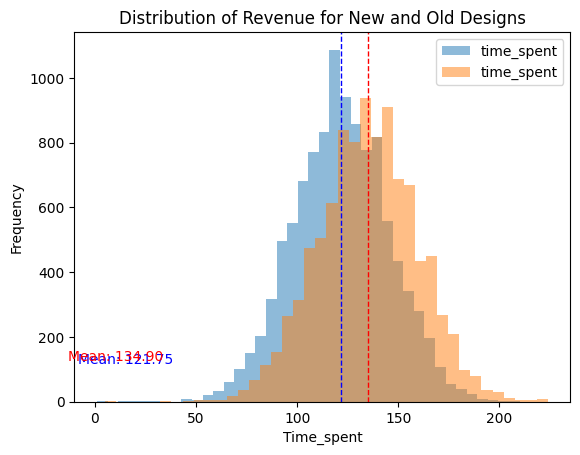

In [823]:
plt.hist(new_design_df['time_spent'], alpha=0.5, label='time_spent', bins=40)
plt.hist(old_design_df['time_spent'], alpha=0.5, label='time_spent', bins=40)

plt.axvline(new_design_df['time_spent'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(old_design_df['time_spent'].mean(), color='red', linestyle='dashed', linewidth=1)

mean1=new_design_df['time_spent'].mean()
mean2=old_design_df['time_spent'].mean()

plt.text(15, mean1 + 7, f'Mean: {mean1:.2f}', ha='center', va='center', color='blue')
plt.text(10, mean2 + 3, f'Mean: {mean2:.2f}', ha='center', va='center', color='red')

plt.legend()
plt.xlabel('Time_spent')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue for New and Old Designs')

first week time-spent <br/> t score=77.25 STD=24.81, standard error(new)=23.58  standard error(old)=24.30  population mean=128.04

<font color="blue">**Chi-Square Test**

1. Chi-Square test for Subscribed<br />H0: There is no association between the type of design and subscribed rate.<br />
H1: There is no association between the type of design and subscribed rate.

In [824]:
df['design'].value_counts()

New    10763
Old     9865
Name: design, dtype: int64

In [825]:
data_subscribed = pd.crosstab(df['design'],df['is_subscribed'])
data_subscribed

is_subscribed,No,Yes
design,,
New,5465,5298
Old,4885,4980


In [826]:
stats.chi2_contingency(data_subscribed)

Chi2ContingencyResult(statistic=3.204674699195494, pvalue=0.07342810934334182, dof=1, expected_freq=array([[5400.28359511, 5362.71640489],
       [4949.71640489, 4915.28359511]]))

Conclusion: P Value=0.073 > 0.05  Fail to reject the null hypothesis. There is no association between the type of design and subcription status

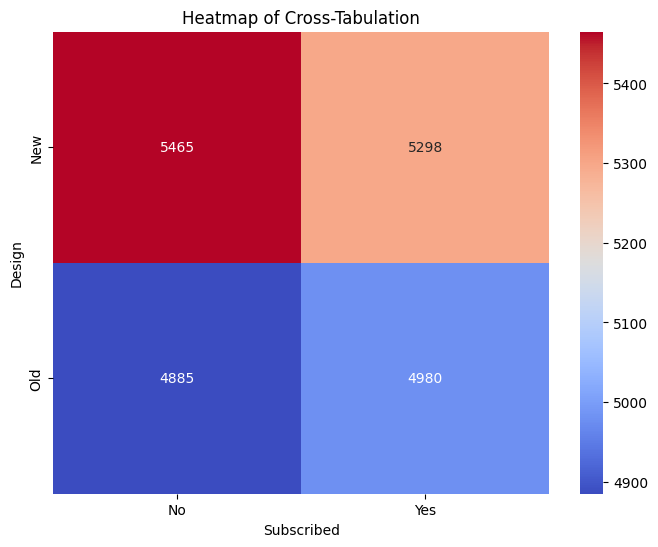

In [827]:
cross_table = pd.crosstab(df['design'], df['is_subscribed'])

# Visualize the cross-tabulation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_table, annot=True, cmap='coolwarm', fmt='d')

plt.title('Heatmap of Cross-Tabulation')
plt.xlabel('Subscribed')
plt.ylabel('Design')

plt.show()

2. Chi-Square test for Retained<br />H0: There is no association between the type of design and retained status.<br />
H1: There is no association between the type of design and retained status.

In [828]:
df['design'].value_counts()

New    10763
Old     9865
Name: design, dtype: int64

In [829]:
data_retained = pd.crosstab(df['design'],df['is_retained'])
data_retained

is_retained,No,Yes
design,,
New,6325,4438
Old,4081,5784


In [830]:
stats.chi2_contingency(data_retained)

Chi2ContingencyResult(statistic=622.536564010803, pvalue=2.0992565726059413e-137, dof=1, expected_freq=array([[5429.50252085, 5333.49747915],
       [4976.49747915, 4888.50252085]]))

In [831]:
survivors = np.array([[4438, 5784], [6325, 4081]])
res   = stats.chi2_contingency(survivors)
res

Chi2ContingencyResult(statistic=622.536564010803, pvalue=2.0992565726059413e-137, dof=1, expected_freq=array([[5333.49747915, 4888.50252085],
       [5429.50252085, 4976.49747915]]))

Conclusion: P Value 2.099e-137 < 0.05  Reject the null hypothesis. There is association between the type of design and retained status

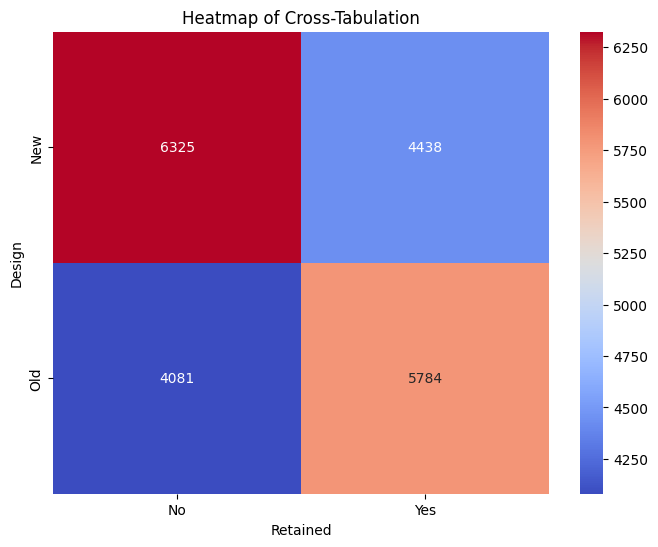

In [832]:
cross_table = pd.crosstab(df['design'], df['is_retained'])
# Visualize the cross-tabulation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_table, annot=True, cmap='coolwarm', fmt='d')

plt.title('Heatmap of Cross-Tabulation')
plt.xlabel('Retained')
plt.ylabel('Design')

plt.show()

**Confidence Intervals **

In [833]:
#conversion[0:100]

<font color="blue">**Permutation Test**<br/>
1. Quantative Data

**permutation test on revenue**

In [834]:
df_revenue=df[['design','revenue']]
df_revenue

,design,revenue
0,New,16
1,Old,8
2,New,12
3,Old,15
4,New,16
...,...,...
20623,New,15
20624,New,17
20625,New,14
20626,New,11


In [835]:
df_revenue.groupby(['design']).mean('revenue')

,revenue
design,
New,14.509895
Old,11.985808


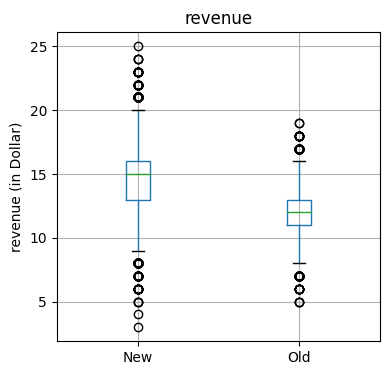

In [836]:
ax = df_revenue.boxplot(by='design', column='revenue',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('revenue (in Dollar)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [837]:
mean_r_N = df_revenue[df_revenue.design == 'New'].revenue.mean()
mean_r_O = df_revenue[df_revenue.design == 'Old'].revenue.mean()
print(mean_r_N - mean_r_O)

2.524086597101377


In [838]:
#mean_a = 14.51
#mean_b = 11.99
#print(mean_b - mean_a)

In [839]:
df_revenue.design=='New'

0         True
1        False
2         True
3        False
4         True
         ...  
20623     True
20624     True
20625     True
20626     True
20627     True
Name: design, Length: 20628, dtype: bool

In [840]:
new_data_revenue = df_revenue[df_revenue['design']=="New"]
new_data_revenue

,design,revenue
0,New,16
2,New,12
4,New,16
6,New,12
8,New,17
...,...,...
20623,New,15
20624,New,17
20625,New,14
20626,New,11


In [841]:
df_revenue.design=='Old'

0        False
1         True
2        False
3         True
4        False
         ...  
20623    False
20624    False
20625    False
20626    False
20627    False
Name: design, Length: 20628, dtype: bool

New desin gain revenue greater than those of old design by $2.52, on average. The question is whether this difference is within the range of what random chance might produce, i.e., is statistically significant.

In [842]:
def perm_fun(x, nA, nB):
    n = nA + nB
    print("nA,nB",nA,nB)
    idx_B = set(random.sample(range(n), nB))
    print('B',idx_B)
    idx_A = set(range(n)) - idx_B
    print('A',idx_A)
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

nA = df_revenue[df_revenue.design == 'New'].shape[0]
nB = df_revenue[df_revenue.design == 'Old'].shape[0]
print(perm_fun(df_revenue.revenue, nA, nB))

nA,nB 10763 9865
B {1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 14, 17, 18, 20, 22, 25, 27, 33, 34, 35, 36, 38, 44, 46, 48, 50, 51, 53, 54, 55, 58, 61, 63, 64, 65, 67, 68, 70, 71, 72, 75, 76, 78, 80, 81, 82, 88, 89, 90, 91, 92, 98, 99, 100, 103, 104, 106, 109, 111, 112, 114, 117, 118, 119, 120, 122, 123, 125, 129, 130, 131, 132, 133, 134, 135, 136, 137, 140, 142, 143, 145, 146, 149, 150, 152, 154, 156, 157, 158, 159, 160, 163, 164, 166, 167, 169, 171, 172, 173, 175, 176, 177, 181, 183, 187, 189, 190, 196, 200, 203, 205, 206, 207, 208, 210, 213, 218, 224, 225, 227, 228, 230, 231, 233, 234, 236, 238, 240, 242, 244, 246, 252, 253, 254, 257, 258, 262, 263, 266, 269, 271, 278, 281, 282, 283, 287, 288, 291, 292, 294, 296, 297, 298, 300, 303, 306, 313, 315, 316, 318, 319, 324, 329, 330, 331, 334, 337, 338, 339, 342, 343, 345, 347, 348, 351, 353, 355, 357, 358, 359, 361, 365, 373, 376, 379, 381, 382, 383, 384, 386, 389, 391, 392, 398, 402, 403, 404, 405, 412, 419, 420, 422, 423, 425, 426, 427, 428, 429,

In [843]:
random.sample(range(36),15)

[31, 7, 26, 10, 18, 35, 6, 14, 28, 25, 34, 19, 29, 3, 33]

In [844]:
list(range(36))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35]

Observed difference: -2.5200


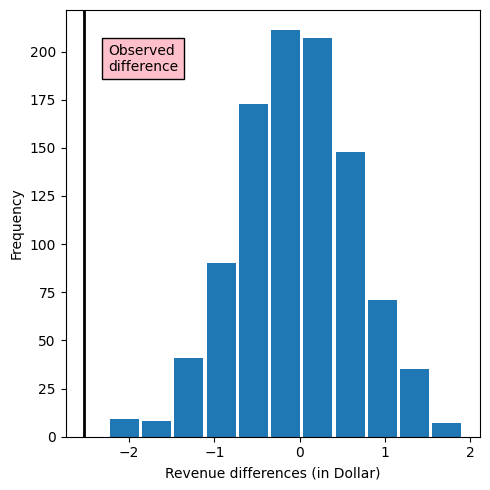

In [898]:
#random.seed(1)
#perm_diffs = [perm_fun(df_revenue.revenue, nA, nB) for _ in range(1000)]
obs_pct_diff = 11.99-14.51
print(f'Observed difference: {obs_pct_diff:.4f}')
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_r_O - mean_r_N, color='black', lw=2)
ax.text(-2.25, 190, 'Observed\ndifference', bbox={'facecolor':'pink'})
ax.set_xlabel('Revenue differences (in Dollar)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': '0'}>]], dtype=object)

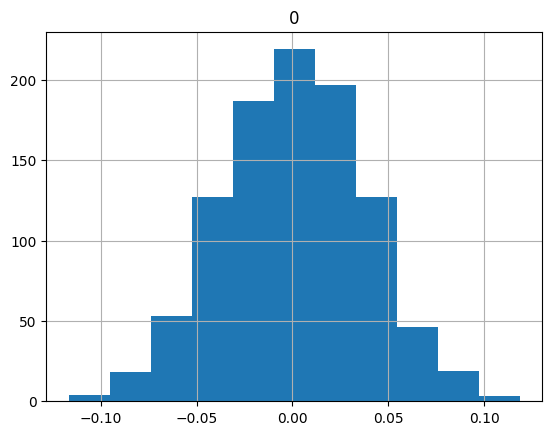

In [760]:
perm_diffs_df=pd.DataFrame(perm_diffs)
perm_diffs_df.hist(bins=11)


In [846]:
perm_diffs[:10]

[0.04195535953904184,
 -0.04411040263476984,
 0.00620795493411741,
 -0.02254539224810337,
 -0.03264791963645308,
 0.004459440578441942,
 0.04894941696174371,
 -0.019631201655311514,
 0.040789683301923674,
 -0.00544880743705356]

In [847]:
len(perm_diffs)

1000

In [848]:
#perm_diffs

In [849]:
import numpy as np

In [850]:
np.mean(perm_diffs > mean_r_O - mean_r_N)

1.0

**Conclusion:** The mean difference of random permutations often exceeds the range of observed difference in times (the vertical line). The results shows this happens close to 100% of the cases. It is very significant new design generate better revernue than old design.

**2. Permutation test for time spent**

In [851]:
df_time_spent=df[['design','time_spent']]
df_time_spent

,design,time_spent
0,New,137
1,Old,111
2,New,127
3,Old,120
4,New,97
...,...,...
20623,New,152
20624,New,111
20625,New,115
20626,New,116


In [852]:
df_time_spent.groupby(['design']).mean('time_spent')

,time_spent
design,
New,121.754344
Old,134.899747


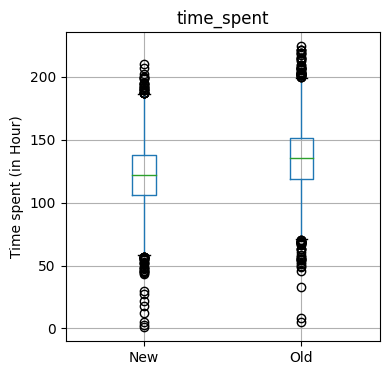

In [853]:
ax = df_time_spent.boxplot(by='design', column='time_spent',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time spent (in Hour)')
plt.suptitle('')

plt.tight_layout()
plt.show()



In [854]:
df_time_spent.design=='New'

0         True
1        False
2         True
3        False
4         True
         ...  
20623     True
20624     True
20625     True
20626     True
20627     True
Name: design, Length: 20628, dtype: bool

In [855]:
df_time_spent.design=='Old'

0        False
1         True
2        False
3         True
4        False
         ...  
20623    False
20624    False
20625    False
20626    False
20627    False
Name: design, Length: 20628, dtype: bool

In [856]:
new_data_time_spent = df_time_spent[df_time_spent['design']=="New"]
new_data_time_spent.head()


,design,time_spent
0,New,137
2,New,127
4,New,97
6,New,117
8,New,151


In [857]:
mean_t_N = df_time_spent[df_time_spent.design == 'New'].time_spent.mean()
mean_t_O = df_time_spent[df_time_spent.design == 'Old'].time_spent.mean()
print(mean_t_O - mean_t_N)


13.145402994311524


In [858]:
def perm_fun(x, nA, nB):
    n = nA + nB
    print("nA,nB",nA,nB)
    idx_B = set(random.sample(range(n), nB))
    print('B',idx_B)
    idx_A = set(range(n)) - idx_B
    print('A',idx_A)
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

nA =  df_time_spent[df_time_spent.design == 'New'].shape[0]
nB =df_time_spent[df_time_spent.design == 'Old'].shape[0]

print(perm_fun(df_time_spent.time_spent, nA, nB))

nA,nB 10763 9865
B {1, 4, 6, 7, 10, 12, 14, 15, 18, 19, 20, 21, 22, 24, 25, 27, 28, 29, 30, 32, 36, 41, 42, 43, 45, 48, 50, 51, 53, 55, 56, 57, 58, 59, 62, 63, 64, 65, 67, 69, 72, 74, 75, 78, 79, 84, 89, 91, 92, 93, 96, 97, 98, 99, 101, 103, 105, 106, 108, 109, 111, 113, 114, 115, 117, 118, 119, 120, 124, 125, 130, 131, 133, 135, 137, 138, 146, 148, 154, 156, 157, 158, 159, 163, 164, 167, 172, 174, 175, 178, 181, 185, 189, 190, 192, 193, 194, 195, 196, 198, 200, 205, 211, 213, 215, 216, 217, 218, 221, 222, 224, 225, 226, 227, 228, 229, 237, 238, 242, 246, 247, 248, 249, 252, 256, 257, 261, 263, 265, 267, 269, 272, 277, 278, 280, 283, 284, 287, 288, 292, 296, 299, 300, 303, 310, 313, 316, 319, 322, 323, 325, 327, 329, 334, 335, 336, 337, 339, 340, 344, 346, 347, 353, 355, 356, 357, 359, 360, 362, 363, 365, 367, 368, 370, 373, 374, 379, 381, 385, 387, 388, 389, 395, 399, 401, 402, 404, 406, 410, 413, 415, 421, 422, 425, 426, 428, 431, 435, 436, 437, 439, 440, 441, 444, 449, 450, 453, 454

In [859]:
random.sample(range(36),15)

[3, 8, 15, 6, 22, 16, 31, 13, 21, 29, 20, 27, 23, 25, 26]

In [860]:
list(range(36))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35]

Observed difference: 13.1500


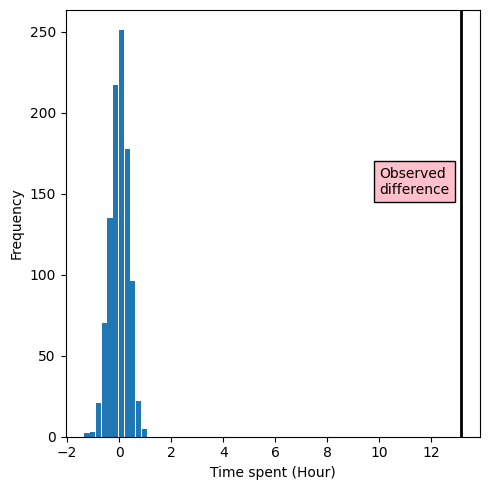

In [897]:
#random.seed(1)
perm_diffs_t = [perm_fun(df_time_spent.time_spent, nA, nB) for _ in range(1000)]
obs_pct_diff = 134.90-121.75
print(f'Observed difference: {obs_pct_diff:.4f}')
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs_t, bins=11, rwidth=0.9)
ax.axvline(x = mean_t_O - mean_t_N, color='black', lw=2)
ax.text(10, 150, 'Observed\ndifference', bbox={'facecolor':'pink'})
ax.set_xlabel('Time spent (Hour)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': '0'}>]], dtype=object)

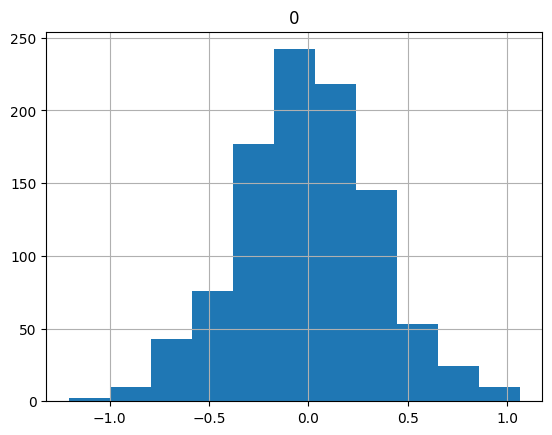

In [863]:
perm_diffs_df_t=pd.DataFrame(perm_diffs_t)
perm_diffs_df_t.hist(bins=11)


In [864]:
perm_diffs_t[:10]

[-0.015858840231800286,
 0.14209028989752426,
 -0.1005646467956609,
 0.22951600768132607,
 0.05913299768937463,
 -0.7218700811790626,
 -0.6666947392888574,
 -0.41393727520731716,
 0.22057915653009275,
 -0.5058314185667001]

In [865]:
len(perm_diffs_t)

1000

In [866]:

np.mean(perm_diffs_t > mean_t_O - mean_t_N)


0.0

**Conclusion:** The mean difference of random permutations exceeds the observed difference in times (the vertical line). The results shows this happens close to 0% of the cases.

<font color=blue>**Permutation test for Categorical Data **

1. Subscribed

In [867]:
data_Subscribed=pd.DataFrame(data.groupby("Design")["Subscribed (Y/N)"].value_counts())
data_Subscribed


Subscribed (Y/N)
Design Subscribed (Y/N)                  
New    No                            5465
       Yes                           5298
Old    Yes                           4980
       No                            4885

In [868]:
Sub = [['Yes',5298,4980], ['No', 5465,4885]]
Subscribed_table = pd.DataFrame(Sub, columns=['Subscribed','New', 'Old'])
Subscribed_table.set_index('Subscribed', inplace=True)
Subscribed_table


,New,Old
Subscribed,,
Yes,5298,4980
No,5465,4885


In [869]:
New_rate=5298/(5298+5465)
Old_rate=4980/(4980+4885)
D_S=New_rate-Old_rate
print(New_rate)
print(Old_rate)
print(D_S)


0.4922419399795596
0.5048150025342119
-0.012573062554652237


The Older design subscribed rate is 1.26% higher than old design. The difference is significant.


How often was the difference >= 0.0126?

In [870]:
(5298+4980+5465+4885)*(0.013)/100

2.68164

In [871]:
5298/(5298+5465) * 100 - 4980/(4980+4885) * 100

-1.257306255465224

In [872]:
4980/(4980+4885) *100

50.48150025342119

In [873]:
5298/(5298+5465) *100

49.224193997955965

In [874]:
50.48/49.22- 1

0.02559934985778134

In [875]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

In [876]:
conversion = [0] * (5465+4885)
len(conversion)
print(conversion[:12])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Observed difference: 1.2573%


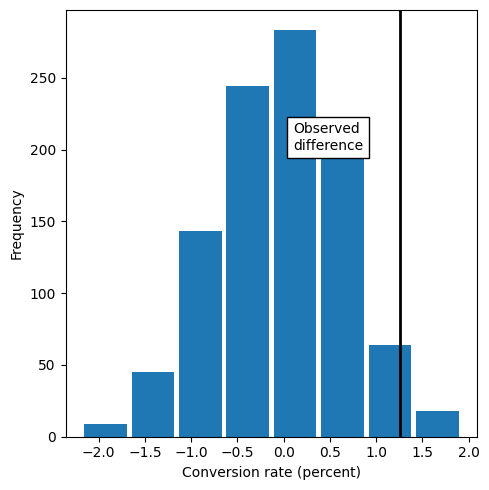

In [877]:
random.seed(1)
obs_pct_diff = 100 * (4980 /(4980+4885)-5298/(5298+5465))
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 10350
conversion.extend([1] * 10278)
conversion = pd.Series(conversion)

perm_diffs_s = [100 * perm_fun(conversion, 10763, 9865)
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs_s, bins=8, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.1, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [878]:
conversion[300:600].head()

300    0
301    0
302    0
303    0
304    0
dtype: int64

**P value**

In [879]:
np.mean([diff > obs_pct_diff for diff in perm_diffs_s])

0.03

*The* p-value is 0.03, which means that we would expect to achieve a result as extreme as this, or a more extreme result, by random chance almost 3% of the time.

2. Retained

In [880]:
data_Retained=pd.DataFrame(data.groupby("Design")["Retained After First Week?"].value_counts())
data_Retained

Retained After First Week?
Design Retained After First Week?                            
New    No                                                6325
       Yes                                               4438
Old    Yes                                               5784
       No                                                4081

In [881]:
Retained = [['Yes',4438,5784], ['No', 6325,4081]]
Retained_table = pd.DataFrame(Retained, columns=['Retained','New', 'Old'])
Retained_table.set_index('Retained', inplace=True)
Retained_table

,New,Old
Retained,,
Yes,4438,5784
No,6325,4081


In [882]:
New_rate_r=4438/(4438+6325)
Old_rate_r=5784/(5784+4081)
D_S_r=New_rate_r-Old_rate_r
print(New_rate_r)
print(Old_rate_r)
print(D_S_r)

0.4123385673139459
0.5863152559553979
-0.173976688641452


In [883]:
4438+5784+6325+4081

20628

In [884]:
20628*0.174/100

35.89272

The Older design retention rate is 17.40% higher than New design. The difference is significant.


How often was the difference >= 0.174?

In [885]:
4438/10763*100-5784/9865*100

-17.397668864145203

In [886]:
4438/10763 *100

41.23385673139459

In [887]:
5784/9865*100

58.63152559553979

In [888]:
58.63/41.23-1

0.422022798932816

In [889]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B1 = set(random.sample(range(n), nB))
    idx_A1 = set(range(n)) - idx_B1
    return x.loc[list(idx_B1)].mean() - x.loc[list(idx_A1)].mean()


In [890]:
conversion = [0] * (10406)
len(conversion)
print(conversion[:24])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [896]:
random.seed(1)
obs_pct_diff = 100 * (5784 / 9865-4438/10763)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * (10406)
conversion.extend([1] * (10222))
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 10763,9865)
              for _ in range(1000)]



Observed difference: 17.3977%


array([[<Axes: title={'center': '0'}>]], dtype=object)

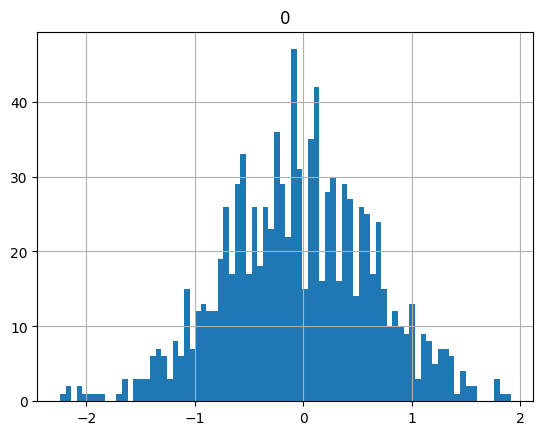

In [892]:
perm_diffs_df = pd.DataFrame(list(perm_diffs))
perm_diffs_df.hist(bins = 80)


Observed difference: 17.3977%


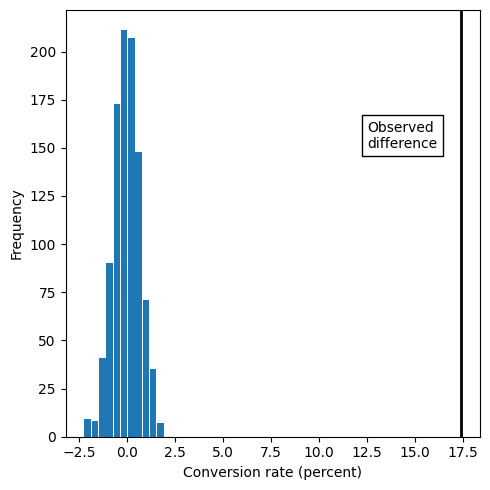

In [893]:
random.seed(1)
obs_pct_diff = 100 * (5784/9865-4438/10763)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 10406
conversion.extend([1] * 10222)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 10763, 9865)
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(12.5, 150, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [894]:
conversion[3450:4000].head()

3450    0
3451    0
3452    0
3453    0
3454    0
dtype: int64

**P value**

In [895]:
np.mean([diff > obs_pct_diff for diff in perm_diffs])

0.0

*The* p-value is 0, which means that we would expect to achieve a result as extreme as this, or a more extreme result, by random chance over near 0% of the time.